# **Исследование объявлений об аренде квартир. Часть 3. Проверка гипотез.**

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('/content/data_clean.csv')

## Описание данных

**metro** (text)	-             Ближайшее метро

**walk_to_metro_flg**	(bool)	-	Флаг пешей доступности

**address**	(text)	-	Адрес

**price**	(float8) -	Цена, руб.

**m_sqarea**	(float8)	-	Метраж, кв.м

**floor_flat**	(float8)	-	Этаж

**floor_max**	(float8)	-	Этажность дома

**rooms**	(int8)	-	Количество комнат

**latitude**	(float8) -	Широта

**longitude**	(float8)	-	Долгота

**district_name** (text) - Округ

**dist_to_center**	(float8)	-	Дальность от Кремля

**r_per_meter**	(float8)	-	Рублей за метр

**room_square**	(float8)	-	Средняя площадь комнаты

**Холодильник**	(int8)	-	Наличие	холодильника

**Посудомоечная машина**	(int8)	-	Наличие	посудомоечной машины

**Стиральная машина**	(int8)	-	Наличие	стиральной машины

**Кондиционер**	(int8)	-	Наличие кондиционера

**Телевизор**	(int8)	-	Наличие телевизора

**Интернет**	(int8)	-	Наличие интернета

**Мебель на кухне**	(int8)	-	Наличие мебели на кухне

**Мебель в комнатах**	(int8)	-	Наличие	мебели в комнатах

**Оплата ЖКХ**	(text)	-	Входит ли стоимость в оплату

**Залог**	(int4) -	Сумма, руб.

**Предоплата_месяцев**	(int4)	-	Кол-во месяцев

**Срок аренды**	(text)	-	От года или нет

**С животными**	(bool)	-	Разрешено ли

**С детьми**	(bool)	-	Разрешено ли

**Общая площадь**	(float8)	-	Площадь, кв.м

**Жилая площадь**	(float8)	-	Площадь, кв.м

**Площадь кухни**	(float8)	-	Площадь, кв.

**Санузел**	(text)	-	Тип и кол-во

**Балкон/лоджия**	(text)	-	Тип и кол-во

**Вид из окон**	(text)	-	Куда выходят окна

**Ремонт**	(text)	-	Тип ремонта

**Год постройки**	(float8)	-	Год постройки

**Количество лифтов**	(text)	Дискретная количественная	Тип и кол-во

**Тип перекрытий**	(text)	-	Тип

**Парковка**	(text)	-	  Тип

**Отопление**	(text) -	  Тип

**Аварийность**	(int4)	-	Да или нет

**school_1000m**	(int8)	-	Кол-во школ в радиусе

**shops_200m**	(int8)	-	Кол-во магазинов в радиусе

**theatre_1000m**	(int8)	-	Кол-во театров в радиусе

**fitness_500m**	(int8)	-	Кол-во спортзалов в радиусе

**cinemas_1500m**	(int8)	-	Кол-во кинотеатров в радиусе

**foods_1000m**	(int8)	-	Кол-во точек питания в радиусе

**kindergarten_500m**	(int8)	-	Кол-во детсадов в радиусе	500 м

**libraries_1000m**	(int8)	-	Кол-во библиотек в радиусе 1000 м

**parks_2000m**	(int8)	-	Кол-во парков в радиусе	2000 м

**post_office_1000m**	(int8)	-	Кол-во почт в радиусе	1000 м

**climbing_1000m**	(int8)	-	Кол-во скалодромов в радиусе 1000 м

**fields_1000m**	(int8)	-	Кол-во футб. полей в радиусе 1000 м

**indoor_swimming_pool_1000m**	(int8)	-	Кол-во бассейнов в радиусе

**malls_2000m**	(int8)	-	Кол-во тц в радиусе

**outdoor_swimming_pool_1000m**	(int8)	-	Кол-во открытых бассейнов в радиусе

**is_first_floor**	(bool)	-	Первый этаж

**is_max_floor**	(bool)	-	Последний этаж дома

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12851 entries, 0 to 12850
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   walk_to_metro_flg            12851 non-null  bool   
 1   m_sqarea                     12851 non-null  float64
 2   floor_flat                   12851 non-null  float64
 3   floor_max                    12851 non-null  float64
 4   rooms                        12851 non-null  int64  
 5   district_name                12851 non-null  object 
 6   dist_to_center               12851 non-null  float64
 7   r_per_meter                  12851 non-null  float64
 8   room_square                  12851 non-null  float64
 9   Холодильник                  12851 non-null  float64
 10  Посудомоечная машина         12851 non-null  float64
 11  Стиральная машина            12851 non-null  float64
 12  Кондиционер                  12851 non-null  float64
 13  Телевизор       

# **Гипотеза**

Стоимоть аренды за квадратный метр зависит от количества объектов инфраструктуры. Если в округе количество объектов инфраструктуры больше среднего, то стоимость будет выше.

In [4]:
# Отберем интересующие нас столбцы:
# На что влияние: 'r_per_meter'
# Разбивка на районы: 'district_name'
# Объекты влияния: 'walk_to_metro_flg', 'school_1000m', 'shops_200m', 'theatre_1000m', 'fitness_500m', 'cinemas_1500m',
# 'foods_1000m', 'kindergarten_500m', 'libraries_1000m', 'parks_2000m', 'post_office_1000m', 'climbing_1000m', 'fields_1000m',
# 'indoor_swimming_pool_1000m','malls_2000m', 'outdoor_swimming_pool_1000m'

selected_columns = ['r_per_meter', 'district_name', 'walk_to_metro_flg', 'school_1000m', 'shops_200m', 'theatre_1000m',
                    'fitness_500m', 'cinemas_1500m', 'foods_1000m', 'kindergarten_500m', 'libraries_1000m', 'parks_2000m',
                    'post_office_1000m', 'climbing_1000m', 'fields_1000m', 'indoor_swimming_pool_1000m','malls_2000m',
                    'outdoor_swimming_pool_1000m']
df = df[selected_columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12851 entries, 0 to 12850
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   r_per_meter                  12851 non-null  float64
 1   district_name                12851 non-null  object 
 2   walk_to_metro_flg            12851 non-null  bool   
 3   school_1000m                 12851 non-null  int64  
 4   shops_200m                   12851 non-null  int64  
 5   theatre_1000m                12851 non-null  int64  
 6   fitness_500m                 12851 non-null  int64  
 7   cinemas_1500m                12851 non-null  int64  
 8   foods_1000m                  12851 non-null  int64  
 9   kindergarten_500m            12851 non-null  int64  
 10  libraries_1000m              12851 non-null  int64  
 11  parks_2000m                  12851 non-null  int64  
 12  post_office_1000m            12851 non-null  int64  
 13  climbing_1000m  

In [6]:
df['walk_to_metro_flg'] = df['walk_to_metro_flg'].astype(int) # Преобразовали bool в int в одном столбце

<ipython-input-6-960bd5e6c385>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['walk_to_metro_flg'] = df['walk_to_metro_flg'].astype(int) # Преобразовали bool в int в одном столбце


In [7]:
infra_columns = [
    'school_1000m', 'shops_200m', 'theatre_1000m', 'fitness_500m',
    'cinemas_1500m', 'foods_1000m', 'kindergarten_500m', 'libraries_1000m',
    'parks_2000m', 'post_office_1000m', 'climbing_1000m', 'fields_1000m',
    'indoor_swimming_pool_1000m', 'malls_2000m', 'outdoor_swimming_pool_1000m'
]

corr = df[infra_columns + ['r_per_meter']].corr()['r_per_meter'].drop('r_per_meter').sort_values(ascending=False)
print(corr)


foods_1000m                    0.385021
parks_2000m                    0.371262
cinemas_1500m                  0.330432
theatre_1000m                  0.240404
malls_2000m                    0.201377
outdoor_swimming_pool_1000m    0.116423
libraries_1000m                0.043754
shops_200m                     0.013589
climbing_1000m                -0.036290
fields_1000m                  -0.037633
indoor_swimming_pool_1000m    -0.040162
fitness_500m                  -0.071950
school_1000m                  -0.125558
kindergarten_500m             -0.138579
post_office_1000m                   NaN
Name: r_per_meter, dtype: float64


In [8]:
X = df[infra_columns]
y = df['r_per_meter']

X = sm.add_constant(X)  # добавляем константу (intercept)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            r_per_meter   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     311.0
Date:                Fri, 02 May 2025   Prob (F-statistic):               0.00
Time:                        15:56:11   Log-Likelihood:                -98729.
No. Observations:               12851   AIC:                         1.975e+05
Df Residuals:                   12836   BIC:                         1.976e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

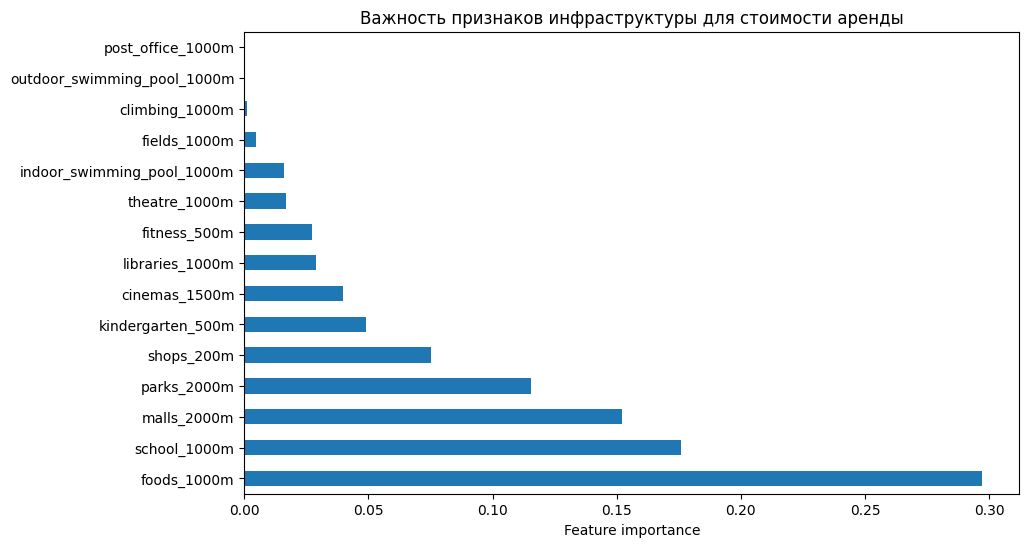

In [9]:
model = RandomForestRegressor()
model.fit(df[infra_columns], df['r_per_meter'])

importances = pd.Series(model.feature_importances_, index=infra_columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков инфраструктуры для стоимости аренды')
plt.xlabel('Feature importance')
plt.show()


## 1. Проанализируем совокупное количество объектов инфраструктуры — для каждой квартиры рассчитаем сумму всех доступных элементов окружающей среды (количество детских садов, школ, парков и др.), чтобы оценить влияние общей инфраструктурной насыщенности.

### 1.1 Гипотеза для всего города

In [10]:
# Столбцы с инфраструктурой
infra_cols = ['walk_to_metro_flg', 'school_1000m', 'shops_200m', 'theatre_1000m',
              'fitness_500m', 'cinemas_1500m', 'foods_1000m', 'kindergarten_500m', 'libraries_1000m', 'parks_2000m',
              'post_office_1000m', 'climbing_1000m', 'fields_1000m', 'indoor_swimming_pool_1000m','malls_2000m',
              'outdoor_swimming_pool_1000m']
df['infra_sum'] = df[infra_cols].sum(axis=1) # Сумма объектов инфраструктуры

In [11]:
infra_mean = df['infra_sum'].mean()
df['infra_group'] = df['infra_sum'] > infra_mean

In [12]:
# Глобальная проверка
group_high = df[df['infra_group']]['r_per_meter']
group_low = df[~df['infra_group']]['r_per_meter']

stat, pval = ttest_ind(group_high, group_low, equal_var=False)  # Welch t-test

print(f"Глобально: p-value = {pval:.4f}")
if pval < 0.05:
    print("Отвергаем H₀: Стоимость действительно выше при большей инфраструктуре")
else:
    print("Не отвергаем H₀: Разницы не выявлено")

Глобально: p-value = 0.0000
Отвергаем H₀: Стоимость действительно выше при большей инфраструктуре


### 1.2 Гипотеза для каждого района города

In [13]:
infra_mean_district = df.groupby('district_name')['infra_sum'].transform('mean')
df['infra_group_district'] = df['infra_sum'] > infra_mean_district

In [14]:
district_results = []

for district in df['district_name'].unique():
    df_district = df[df['district_name'] == district]

    high = df_district[df_district['infra_group_district']]['r_per_meter']
    low = df_district[~df_district['infra_group_district']]['r_per_meter']

    if len(high) > 5 and len(low) > 5:  # минимальный размер выборки
        stat, p = ttest_ind(high, low, equal_var=False)
        result = 'Разница есть' if p < 0.05 else 'Разницы нет'
        district_results.append((district, p, result))

# Вывод
result_df = pd.DataFrame(district_results, columns=['Район', 'p-value', 'Гипотеза'])
print(result_df.sort_values('p-value'))

                                      Район       p-value      Гипотеза
3              Южный административный округ  1.249191e-40  Разница есть
8           Северный административный округ  3.641950e-34  Разница есть
5   Северо-Восточный административный округ  4.093133e-17  Разница есть
4       Юго-Западный административный округ  3.930093e-10  Разница есть
7        Центральный административный округ  4.994866e-09  Разница есть
6           Западный административный округ  4.595127e-05  Разница есть
1           Троицкий административный округ  2.477998e-04  Разница есть
0          Восточный административный округ  5.105993e-04  Разница есть
10   Северо-Западный административный округ  4.493081e-03  Разница есть
11    Зеленоградский административный округ  1.293487e-02  Разница есть
2      Юго-Восточный административный округ  1.871107e-01   Разницы нет
9     Новомосковский административный округ  2.174319e-01   Разницы нет


# 2. Для каждого типа инфраструктуры будем учитывать только факт её наличия — независимо от количества объектов (например, наличие хотя бы одного детского сада засчитывается как 1). На основе суммы таких наличий проанализируем влияние инфраструктуры на стоимость жилья.

In [15]:
df[infra_cols] = df[infra_cols].astype(bool).astype(int) # Преобразуем наличие объектов в bool

## 2.1 Гипотеза для всего города

In [16]:
df['infra_bool_sum'] = df[infra_cols].sum(axis=1)
infra_bool_mean = df['infra_bool_sum'].mean()
df['infra_bool_group'] = df['infra_bool_sum'] > infra_bool_mean

In [17]:
# Глобальная проверка
group_high = df[df['infra_bool_group']]['r_per_meter']
group_low = df[~df['infra_bool_group']]['r_per_meter']

stat, pval = ttest_ind(group_high, group_low, equal_var=False)  # Welch t-test

print(f"Глобально: p-value = {pval:.4f}")
if pval < 0.05:
    print("Отвергаем H₀: Стоимость действительно выше при большей инфраструктуре")
else:
    print("Не отвергаем H₀: Разницы не выявлено")

Глобально: p-value = 0.0000
Отвергаем H₀: Стоимость действительно выше при большей инфраструктуре


## 2.2 Гипотеза для каждого района города

In [18]:
infra_bool_mean_district = df.groupby('district_name')['infra_bool_sum'].transform('mean')
df['infra_bool_group_district'] = df['infra_bool_sum'] > infra_bool_mean_district

In [19]:
district_results = []

for district in df['district_name'].unique():
    df_district = df[df['district_name'] == district]

    high = df_district[df_district['infra_bool_group_district']]['r_per_meter']
    low = df_district[~df_district['infra_bool_group_district']]['r_per_meter']

    if len(high) > 5 and len(low) > 5:  # минимальный размер выборки
        stat, p = ttest_ind(high, low, equal_var=False)
        result = 'Разница есть' if p < 0.05 else 'Разницы нет'
        district_results.append((district, p, result))

# Вывод
result_df = pd.DataFrame(district_results, columns=['Район', 'p-value', 'Гипотеза'])
print(result_df.sort_values('p-value'))

                                      Район       p-value      Гипотеза
10   Северо-Западный административный округ  2.123099e-11  Разница есть
4       Юго-Западный административный округ  1.213861e-07  Разница есть
2      Юго-Восточный административный округ  4.524211e-04  Разница есть
6           Западный административный округ  8.194326e-04  Разница есть
9     Новомосковский административный округ  6.445428e-03  Разница есть
11    Зеленоградский административный округ  8.118779e-03  Разница есть
0          Восточный административный округ  2.030284e-02  Разница есть
8           Северный административный округ  2.555709e-02  Разница есть
1           Троицкий административный округ  4.837347e-02  Разница есть
7        Центральный административный округ  1.276315e-01   Разницы нет
5   Северо-Восточный административный округ  1.852115e-01   Разницы нет
3              Южный административный округ  3.020410e-01   Разницы нет


In [20]:
import pandas as pd
from statsmodels.stats.multitest import multipletests

data = {
    'Район': [
        'Северо-Западный административный округ',
        'Юго-Западный административный округ',
        'Юго-Восточный административный округ',
        'Западный административный округ',
        'Новомосковский административный округ',
        'Зеленоградский административный округ',
        'Восточный административный округ',
        'Северный административный округ',
        'Троицкий административный округ',
        'Центральный административный округ',
        'Северо-Восточный административный округ',
        'Южный административный округ'
    ],
    'p-value': [
        2.123099e-11,
        1.213861e-07,
        4.524211e-04,
        8.194326e-04,
        6.445428e-03,
        8.118779e-03,
        2.030284e-02,
        2.555709e-02,
        4.837347e-02,
        1.276315e-01,
        1.852115e-01,
        3.020410e-01
    ]
}

df_p_value = pd.DataFrame(data)

In [21]:
from statsmodels.stats.multitest import multipletests

pvals = df_p_value['p-value'].values
_, pvals_corrected, _, _ = multipletests(pvals, method='bonferroni')  # или 'fdr_bh'

df_p_value['p_corrected'] = pvals_corrected
df_p_value['Гипотеза_скоррект'] = df_p_value['p_corrected'] < 0.05

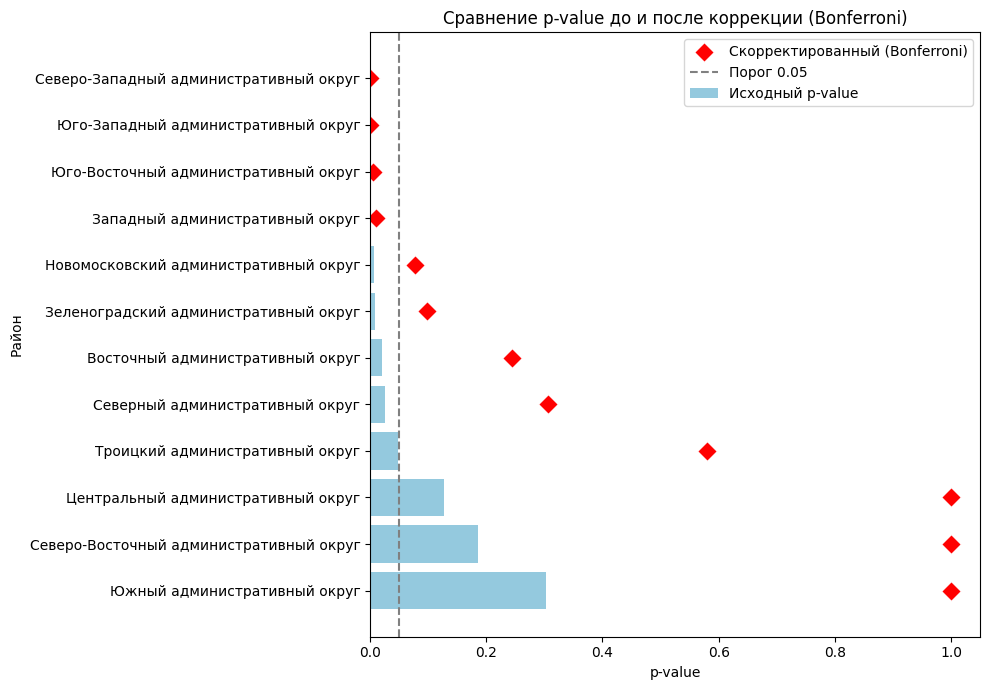

In [22]:
# Сортировка по p-value (для удобства на графике)
df_sorted = df_p_value.sort_values('p-value')

plt.figure(figsize=(10, 7))

# Столбики для обычных p-value
sns.barplot(
    y='Район',
    x='p-value',
    data=df_sorted,
    color='skyblue',
    label='Исходный p-value'
)

# Столбики поверх — скорректированные p-value
sns.scatterplot(
    y='Район',
    x='p_corrected',
    data=df_sorted,
    color='red',
    label='Скорректированный (Bonferroni)',
    marker='D',
    s=100
)

# Порог значимости
plt.axvline(0.05, color='gray', linestyle='--', label='Порог 0.05')

plt.title('Сравнение p-value до и после коррекции (Bonferroni)')
plt.xlabel('p-value')
plt.ylabel('Район')
plt.legend()
plt.tight_layout()
plt.show()

Влияние инфраструктуры на стоимость аренды действительно наблюдается в ряде округов, но после строгой коррекции на множественные сравнения статистически значимыми остаются только наиболее уверенные различия.